In [1]:
import numpy as np
from PIL import Image
import os
from random import randint
import matplotlib.pyplot as plt


In [1]:
# write function for sum of two numbers


In [2]:
# function to convert all the images to same height and width
def resize_images(input_folder, output_folder, target_size):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Open the image
            image_path = os.path.join(input_folder, filename)
            image = Image.open(image_path)
            
            # Resize the image to the target size
            resized_image = image.resize(target_size, Image.BILINEAR)
            
            # Save the resized image with a new filename in the output folder
            output_path = os.path.join(output_folder, filename)
            resized_image.save(output_path)


In [3]:
# Generating the resized images to new folder
input_folder = './images'
output_folder = './resized_images'
target_size = (500, 500)  # Set the target size (width, height) in pixels
resize_images(input_folder, output_folder, target_size)

In [4]:
# Load image to numpy array in rgb pixels
def load_image(image_path):
    # Load image
    image = Image.open(image_path)
    # Convert image to numpy array
    image_array = np.array(image)
    return image_array

In [5]:
# Example usage
image_path = './Images/image_02.jpg'
image_array = load_image(image_path)

# Display shape and example RGB values
print("Image shape:", image_array.shape)
print("Image array", image_array)
print(image_array.dtype)


Image shape: (2080, 3120, 3)
Image array [[[ 75 168 229]
  [ 75 168 229]
  [ 75 168 229]
  ...
  [ 90  59  12]
  [ 89  58  11]
  [ 86  58  10]]

 [[ 75 168 229]
  [ 75 168 229]
  [ 75 168 229]
  ...
  [ 87  56   9]
  [ 85  57   9]
  [ 84  56   8]]

 [[ 75 168 229]
  [ 75 168 229]
  [ 75 168 229]
  ...
  [ 85  54   8]
  [ 82  54   7]
  [ 81  53   6]]

 ...

 [[181 141  71]
  [184 144  74]
  [178 137  71]
  ...
  [109  98  80]
  [109  98  80]
  [109  98  80]]

 [[181 141  71]
  [183 143  73]
  [175 134  68]
  ...
  [109  98  80]
  [109  98  80]
  [109  98  80]]

 [[179 139  69]
  [182 142  72]
  [174 133  67]
  ...
  [109  98  80]
  [109  98  80]
  [109  98  80]]]
uint8


In [6]:
# converting 3d image array to 2d containing all pixels in one column
def convert_3d_to_2d(array):
    image_2d = array.reshape(-1, 3)
    return image_2d


In [7]:
# Example 
image_path = './resized_images/image_03.jpg'
image_3d = load_image(image_path) 
# print(image_3d.shape)
image_2d = convert_3d_to_2d(image_3d)
print(image_2d.shape)
# print(image_3d[0])
# print(image_2d[0])
image_2d

(250000, 3)


array([[ 95, 103,  92],
       [116, 124, 113],
       [138, 146, 135],
       ...,
       [ 32,  50,  72],
       [ 43,  61,  83],
       [ 55,  73,  95]], dtype=uint8)

In [8]:
# selecting centroids
def select_centroids(array,no_of_cent=3):
    indices = [randint(0, array.shape[0]) for _ in range(no_of_cent)]
    centroids = array[indices]
    return centroids
centroids = select_centroids(image_2d,3)
centroids

array([[156, 114, 102],
       [175, 154, 171],
       [ 18,  32,  45]], dtype=uint8)

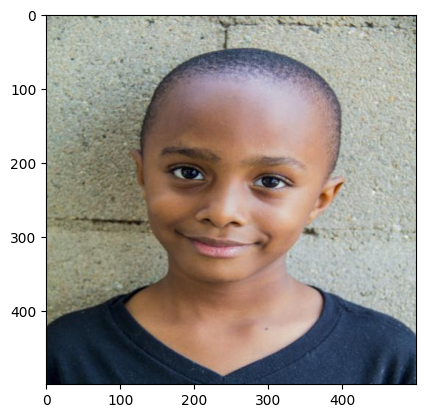

In [9]:
plt.imshow(image_3d)
plt.show()

In [10]:
# Functions to calculate distances between each pixel and centroids
def calc_dist_euclidean(image_2d, centroids):
    return np.sqrt(np.sum((image_2d[:, np.newaxis] - centroids) ** 2, axis=2))

def calc_dist_manhattan(image_2d, centroids):
    return np.sum(np.abs(image_2d[:, np.newaxis] - centroids), axis=2)

In [13]:
# Function to perform K-means clustering
def k_means_inside(image_2d, centroids, iterations, distance_function):
    print(f"Applying k means.....")
    for _ in range(iterations):
        # Calculate distances
        dists = distance_function(image_2d, centroids)
        # Find the index of the minimum distance for each pixel
        idx = np.argmin(dists, axis=1)
        # Update the pixels based on the index
        image_2d_centroids = centroids[idx]
        # Calculate the mean of the pixel values categorized for each centroid to update the centroids
        centroids = np.array([np.mean(image_2d[np.where(idx == i)], axis=0) for i in range(centroids.shape[0])])
    return image_2d_centroids

# converting back to image
def convert_2d_to_image(image_2d, original_shape):
    print("Converting to image.........")
    image_2d[np.isnan(image_2d)] = 0

    rounded_image_2d = image_2d.astype(int)
    # Clip pixel values to the range [0, 255]
    clipped_image_2d = np.clip(rounded_image_2d, 0, 255)
    # Round pixel values to integers
    
    # Print the minimum and maximum values after rounding
    # print("Minimum value after rounding:", np.min(clipped_image_2d))
    # print("Maximum value after rounding:", np.max(clipped_image_2d))

    # Convert pixel values to unsigned integers (uint8)
    return clipped_image_2d.astype(np.uint8).reshape(original_shape)
# K Means
def K_Means(image_path, distance_function=calc_dist_manhattan, K=3, iterations=100):
    image_original = load_image(image_path)      # returns numpy array
    image_2d = convert_3d_to_2d(image_original)
    centroids = select_centroids(image_2d, K)

    updated_2d = k_means_inside(image_2d, centroids, iterations, distance_function)
    image_original_shape = (500, 500, 3)
    # Convert the updated 2D array back to image
    updated_image = convert_2d_to_image(updated_2d, image_original_shape)
    return updated_image


In [14]:
def display_image(array):
    # Display the updated image using matplotlib
    plt.imshow(array)
    plt.axis('off')
    plt.show()

Applying k means.....
Converting to image.........


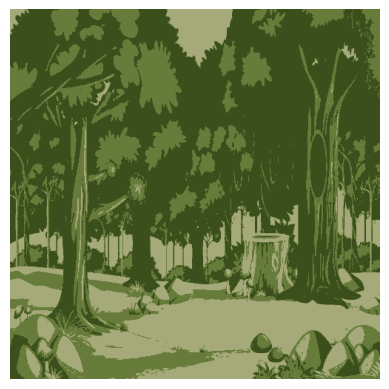

In [15]:
# Running K Mean (Example 01)
img01 = "resized_images/image_01.jpg"
img02 = "resized_images/image_02.jpg"
img03 = "resized_images/image_03.jpg"
distance_function = calc_dist_manhattan
K = 3
iterations = 10
updated_image = K_Means(img01,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


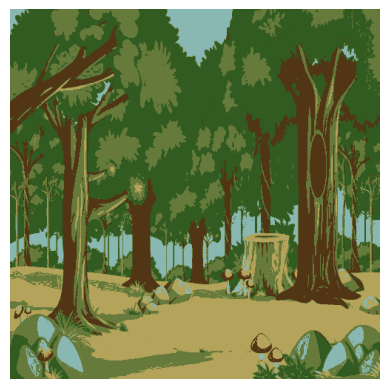

In [16]:
K = 5
updated_image = K_Means(img01,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


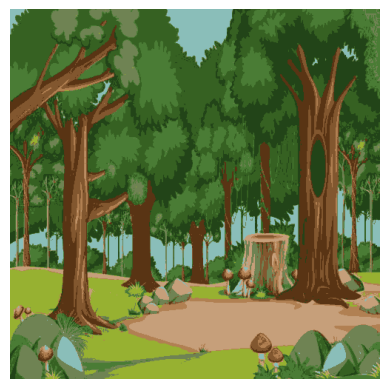

In [17]:
K = 10
updated_image = K_Means(img01,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


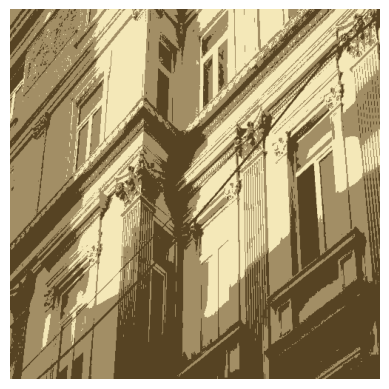

In [18]:
K = 3
updated_image = K_Means(img02,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


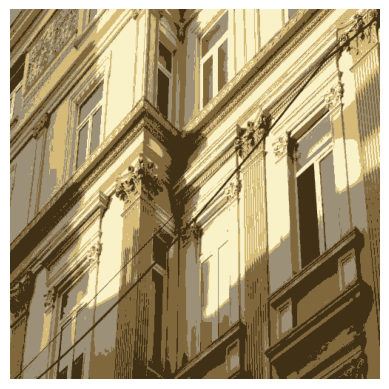

In [19]:
K = 5
updated_image = K_Means(img02,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


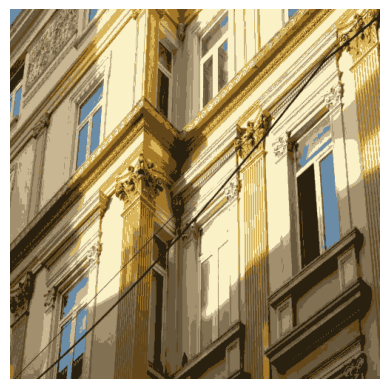

In [20]:
K = 10
updated_image = K_Means(img02,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


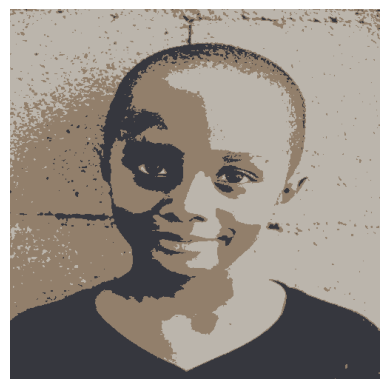

In [21]:
K = 3
updated_image = K_Means(img03,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


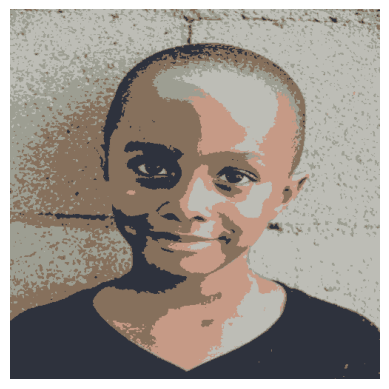

In [22]:
K = 5
updated_image = K_Means(img03,distance_function,K, iterations)
display_image(updated_image)

Applying k means.....
Converting to image.........


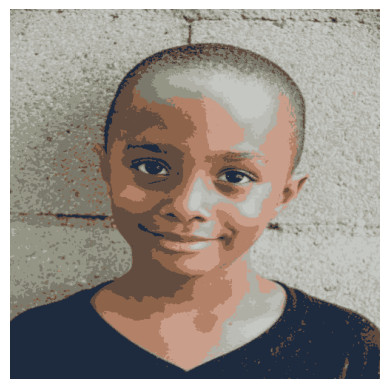

In [23]:
K = 10
updated_image = K_Means(img03,distance_function,K, iterations)
display_image(updated_image)